In [1]:
from datetime import date
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2 

In [2]:
# load custom collection of functions
import sys
sys.path.append('/home/schmiedc/FMP_Docs/Projects/Bioactives_data/notebooks/')
import utility_functions as UTIL

In [3]:
parent_directory = "/home/schmiedc/FMP_Docs/Projects/Bioactives_data/"

input_path = parent_directory + "results/"
output_path = input_path

figure_path = parent_directory + "figures/"

# Annotations
annot_path = parent_directory  + "annotations/"

In [4]:
file_U2OS_type = '/*[0-9]_' + 'FMP_U2OS_norm.csv'
files_U2OS = glob.glob(input_path + file_U2OS_type)

### gets latest file
max_file_U2OS = max(files_U2OS, key=os.path.getctime)

### load file
data_U2OS_Norm = pd.read_csv(max_file_U2OS)
data_U2OS_Norm.shape

(10629, 2984)

In [5]:
file_HepG2_type = '/*[0-9]_' + 'FMP_HepG2_norm.csv'
files_HepG2 = glob.glob(input_path + file_HepG2_type)

### gets latest file
max_file_HepG2 = max(files_HepG2, key=os.path.getctime)

### load file
data_HepG2_Norm = pd.read_csv(max_file_HepG2)
data_HepG2_Norm.shape

(10697, 2984)

In [6]:
file_U2OS_norm_median_type = '/*[0-9]_' + 'FMP_U2OS_norm_median_full.csv'
files_U2OS_norm_median = glob.glob(input_path + file_U2OS_norm_median_type)

### gets latest file
max_file_U2OS_norm_median = max(files_U2OS_norm_median, key=os.path.getctime)

### load file
data_U2OS_Norm_median = pd.read_csv(max_file_U2OS_norm_median)
data_U2OS_Norm_median.shape

(2467, 2982)

In [7]:
file_HepG2_norm_median_type = '/*[0-9]_' + 'FMP_HepG2_norm_median_full.csv'
files_HepG2_norm_median = glob.glob(input_path + file_HepG2_norm_median_type)

### gets latest file
max_file_HepG2_norm_median = max(files_HepG2_norm_median, key=os.path.getctime)

### load file
data_HepG2_Norm_median = pd.read_csv(max_file_HepG2_norm_median)
data_HepG2_Norm_median.shape

(2480, 2982)

# Missing compounds

In [8]:
file_type = '/*[0-9]_' + 'Annotation_Bioactives_U2OS_Corrected.csv'
files = glob.glob(annot_path + file_type)

### gets latest file
max_file = max(files, key=os.path.getctime)

### load file
Annotation_Bioactives = pd.read_csv(max_file)
Annotation_Bioactives.shape

(10752, 6)

In [9]:
all_ID = Annotation_Bioactives["Metadata_EOS"].unique()
len(all_ID)

2467

In [10]:
U2OS_ID = data_U2OS_Norm_median["Metadata_EOS"].unique()
print("U2OS: There are ",len(all_ID) - len(U2OS_ID),"compounds missing")

U2OS: There are  18 compounds missing


In [11]:
HepG2_ID = data_HepG2_Norm_median["Metadata_EOS"].unique()
print("HepG2: There are ",len(all_ID) - len(HepG2_ID),"compounds missing")

HepG2: There are  5 compounds missing


In [12]:
U2OS_ID_frame = pd.DataFrame(U2OS_ID, columns=["ID"])
HepG2_ID_frame = pd.DataFrame(HepG2_ID, columns=["ID"])
all_ID_frame = pd.DataFrame(all_ID, columns=["ID"])

In [13]:
U2OS_missing_compounds = pd.merge(all_ID_frame, 
                                 U2OS_ID_frame,
                                 on = ["ID"],
                                 how = "left",
                                 indicator = True)

U2OS_missing_compounds = U2OS_missing_compounds[U2OS_missing_compounds["_merge"] == 'left_only'].dropna(axis='columns')

In [14]:
### 
filename = output_path + str(date.today()) + "_FMP_U2OS_raw_missing_compounds.csv"
U2OS_missing_compounds.to_csv(filename, index = False)

In [15]:
HepG2_missing_compounds = pd.merge(all_ID_frame, 
                                 HepG2_ID_frame,
                                 on = ["ID"],
                                 how = "left",
                                 indicator = True)

HepG2_missing_compounds = HepG2_missing_compounds[HepG2_missing_compounds["_merge"] == 'left_only'].dropna(axis='columns')

In [16]:
### 
filename = output_path + str(date.today()) + "_FMP_HepG2_raw_missing_compounds.csv"
HepG2_missing_compounds.to_csv(filename, index = False)

In [17]:
U2OS_HepG2_missing = pd.merge(U2OS_missing_compounds.drop(columns=["_merge"]),
                              HepG2_missing_compounds.drop(columns=["_merge"]),
                              on = ["ID"],
                              how = "outer",
                              indicator = True)

In [18]:
missing_for_venn = U2OS_HepG2_missing['_merge'].value_counts()
missing_for_venn

left_only     15
both           3
right_only     2
Name: _merge, dtype: int64

In [19]:
missing_U2OS_only = missing_for_venn[0]
missing_HepG2_only = missing_for_venn[2]
missing_U2OS_HepG2 = missing_for_venn[1]

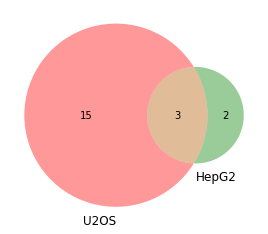

In [20]:
venn2(subsets = (missing_U2OS_only, missing_HepG2_only, missing_U2OS_HepG2), set_labels = ('U2OS', 'HepG2'))
plt.show()

# Compounds with less than 4 replicates

In [21]:
data_U2OS_Norm_replicates = data_U2OS_Norm['Metadata_EOS'].value_counts()
print("U2OS: There are",len(data_U2OS_Norm_replicates[data_U2OS_Norm_replicates.iloc[:] < 4]), "compounds with less than 4 replicates.")

U2OS: There are 27 compounds with less than 4 replicates.


<AxesSubplot: xlabel='Metadata_EOS', ylabel='Count'>

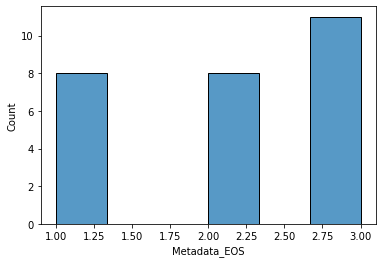

In [22]:
data_U2OS_Norm_replicates_less = data_U2OS_Norm_replicates[data_U2OS_Norm_replicates.loc[:] < 4]
data_U2OS_Norm_replicates_less = data_U2OS_Norm_replicates_less.to_frame()
sns.histplot(data=data_U2OS_Norm_replicates_less, x="Metadata_EOS")

In [23]:
data_HepG2_Norm_replicates = data_HepG2_Norm['Metadata_EOS'].value_counts()
print("HepG2: There are",len(data_HepG2_Norm_replicates[data_HepG2_Norm_replicates.iloc[:] < 4]), "compounds with less than 4 replicates.")

HepG2: There are 22 compounds with less than 4 replicates.


<AxesSubplot: xlabel='Metadata_EOS', ylabel='Count'>

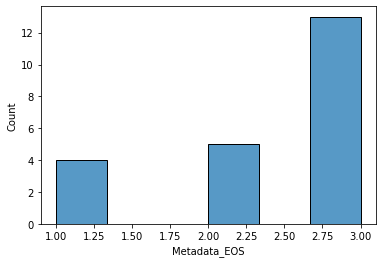

In [24]:
data_HepG2_Norm_replicates_less = data_HepG2_Norm_replicates[data_HepG2_Norm_replicates.loc[:] < 4]
data_HepG2_Norm_replicates_less = data_HepG2_Norm_replicates_less.to_frame()
sns.histplot(data=data_HepG2_Norm_replicates_less, x="Metadata_EOS")

# Cell number

In [25]:
data_HepG2_Norm_mod = data_HepG2_Norm.columns.drop(list(data_HepG2_Norm.filter(regex="Metadata_")) )

In [26]:
data_HepG2_Norm_mod = data_HepG2_Norm[
    data_HepG2_Norm.columns[
        data_HepG2_Norm.columns.isin(
            ["Metadata_EOS", "Metadata_Well", "Metadata_Batch", "Metadata_Plate", "Metadata_Object_Count"])]]

In [27]:
data_U2OS_Norm_mod = data_U2OS_Norm[
    data_U2OS_Norm.columns[
        data_U2OS_Norm.columns.isin(
            ["Metadata_EOS", "Metadata_Well", "Metadata_Batch", "Metadata_Plate", "Metadata_Object_Count"])]]

In [28]:
cell_number = pd.merge(data_U2OS_Norm_mod,
                       data_HepG2_Norm_mod,
                       suffixes = ["_U2OS", "_HepG2"],
                       on = ["Metadata_EOS", "Metadata_Well", "Metadata_Batch", "Metadata_Plate"],
                       how = "outer",
                       indicator = True)

In [29]:
plt.rcParams["figure.figsize"] = (15,10)

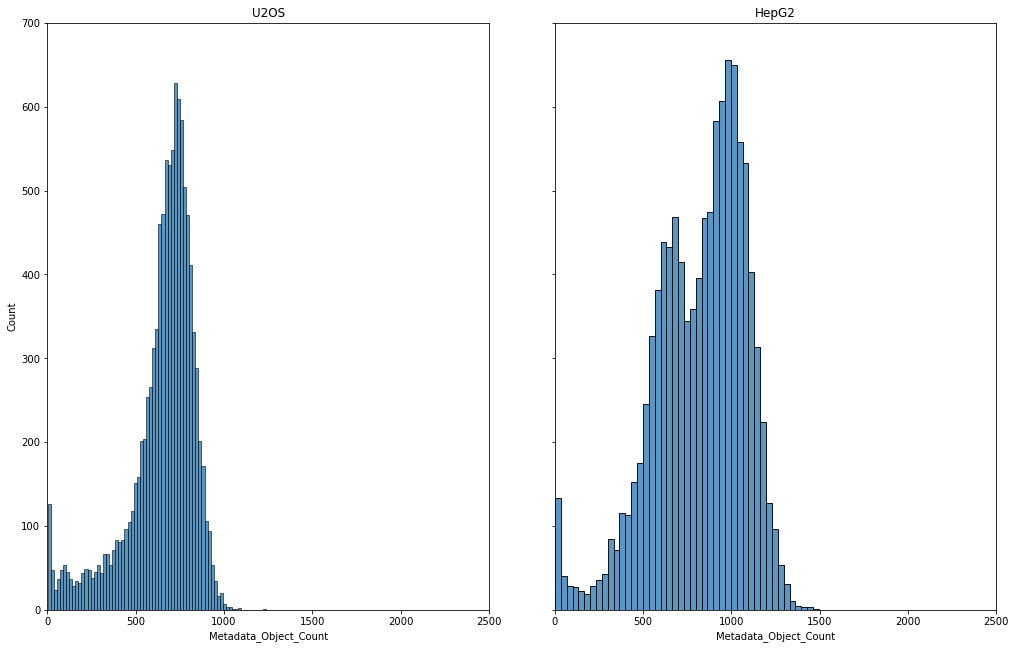

In [30]:
fig, (ax1, ax2)= plt.subplots(1,2, sharex=True, sharey=True)
ax1.title.set_text('U2OS')
ax2.title.set_text('HepG2')
fig.tight_layout(pad=5.0)
sns.histplot(data=data_U2OS_Norm, x="Metadata_Object_Count", ax = ax1)
sns.histplot(data=data_HepG2_Norm, x="Metadata_Object_Count", ax = ax2)
plt.xlim([0, 2500])
plt.ylim([0, 700])
plt.savefig(figure_path + str(date.today()) + '_FMP_CellNumber.pdf',  dpi=300)

<AxesSubplot: title={'center': 'HepG2'}, ylabel='Metadata_Object_Count'>

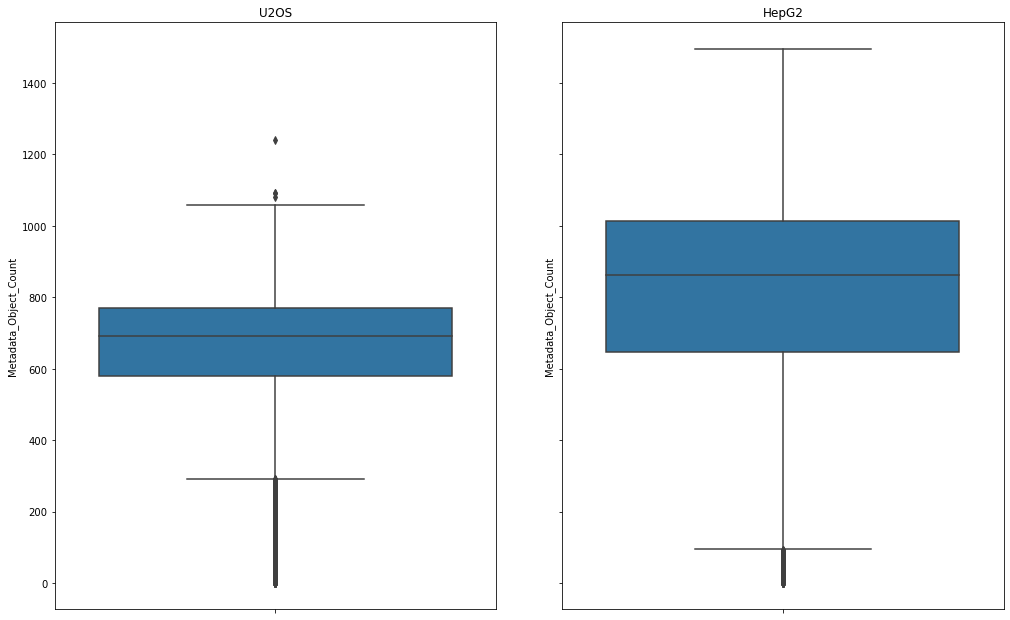

In [31]:
fig, (ax1, ax2)= plt.subplots(1,2, sharex=True, sharey=True)
ax1.title.set_text('U2OS')
ax2.title.set_text('HepG2')
fig.tight_layout(pad=5.0)
sns.boxplot(data=data_U2OS_Norm, y="Metadata_Object_Count", ax = ax1)
sns.boxplot(data=data_HepG2_Norm, y="Metadata_Object_Count", ax = ax2)

In [32]:
print("Median U2OS cell number:",data_U2OS_Norm["Metadata_Object_Count"].median(),"cells")

Median U2OS cell number: 691.0 cells


In [33]:
print("Median HepG2 cell number:",data_HepG2_Norm["Metadata_Object_Count"].median(),"cells")

Median HepG2 cell number: 863.0 cells


In [34]:
# plot cell numbers of controls
U2OS_Norm_Controls = data_U2OS_Norm[(data_U2OS_Norm["Metadata_EOS"] == "DMSO") |
                                    (data_U2OS_Norm["Metadata_EOS"] == "Nocodazole") |
                                    (data_U2OS_Norm["Metadata_EOS"] == "Tetrandrine") ]

In [35]:
# plot cell numbers of controls
HepG2_Norm_Controls = data_HepG2_Norm[(data_HepG2_Norm["Metadata_EOS"] == "DMSO") |
                                    (data_HepG2_Norm["Metadata_EOS"] == "Nocodazole") |
                                    (data_HepG2_Norm["Metadata_EOS"] == "Tetrandrine") ]

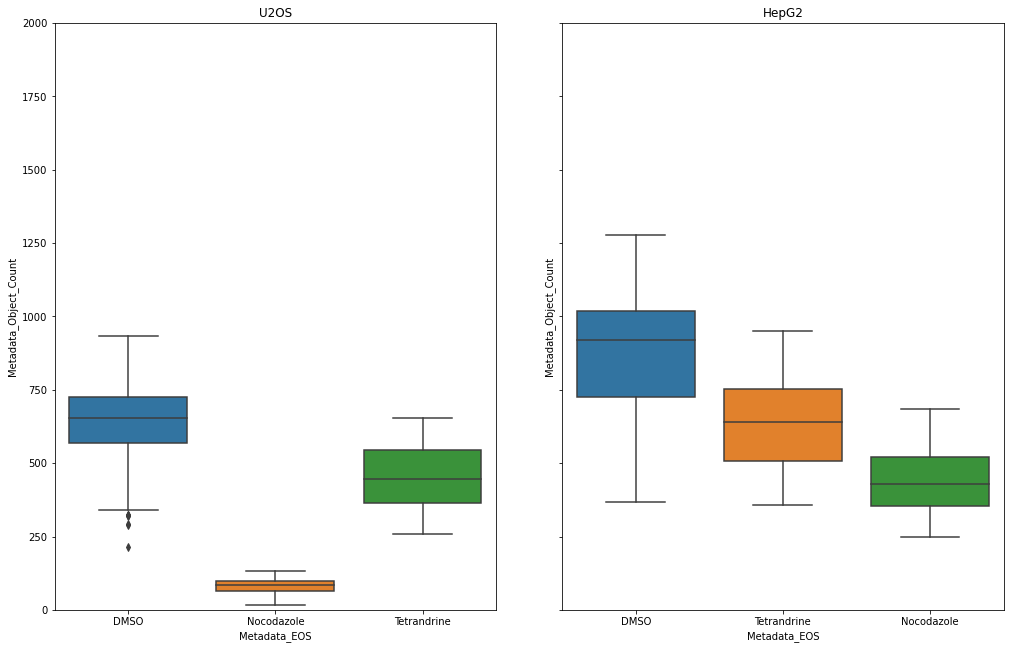

In [36]:
fig, (ax1, ax2)= plt.subplots(1,2, sharex=False, sharey=True)
ax1.title.set_text('U2OS')
ax2.title.set_text('HepG2')
fig.tight_layout(pad=5.0)
sns.boxplot(data=U2OS_Norm_Controls, y="Metadata_Object_Count", x="Metadata_EOS", ax=ax1)
sns.boxplot(data=HepG2_Norm_Controls, y="Metadata_Object_Count", x="Metadata_EOS", ax=ax2)
plt.ylim([0, 2000])
plt.savefig(figure_path + str(date.today()) + '_FMP_CellNumberControls.pdf',  dpi=300)

In [37]:
noco = data_U2OS_Norm["Metadata_EOS"] == "Nocodazole"

<AxesSubplot: xlabel='Metadata_EOS', ylabel='Metadata_Object_Count'>

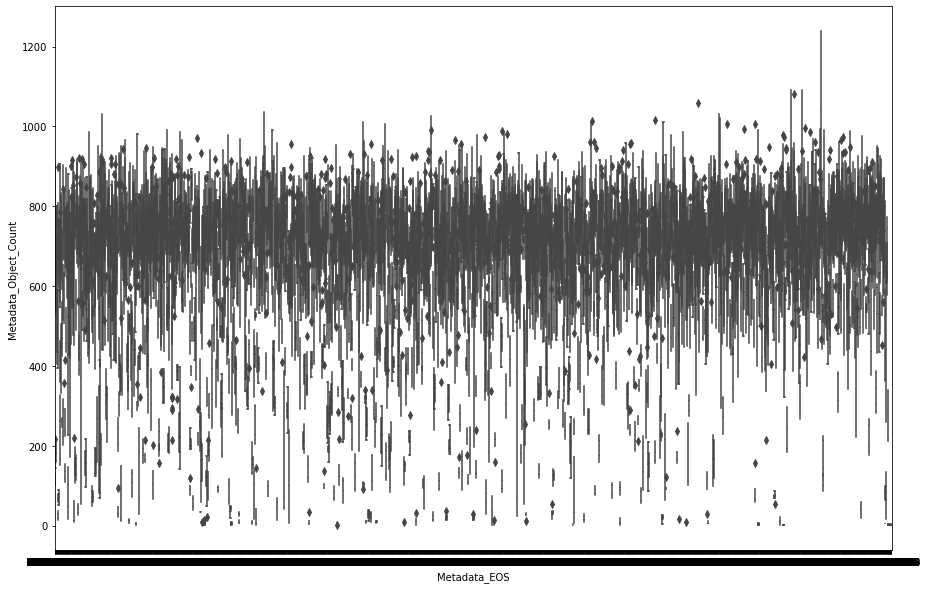

In [38]:
sns.boxplot(data=data_U2OS_Norm, y="Metadata_Object_Count", x="Metadata_EOS")

In [39]:
print("Median U2OS DMSO cell number:",U2OS_Norm_Controls[(U2OS_Norm_Controls["Metadata_EOS"] == "DMSO")]["Metadata_Object_Count"].median(),"cells")
print("Median U2OS Nocodazole cell number:",U2OS_Norm_Controls[(U2OS_Norm_Controls["Metadata_EOS"] == "Nocodazole")]["Metadata_Object_Count"].median(),"cells")
print("Median U2OS Tetrandrine cell number:",U2OS_Norm_Controls[(U2OS_Norm_Controls["Metadata_EOS"] == "Tetrandrine")]["Metadata_Object_Count"].median(),"cells")

Median U2OS DMSO cell number: 653.0 cells
Median U2OS Nocodazole cell number: 84.5 cells
Median U2OS Tetrandrine cell number: 445.0 cells


In [40]:
print("Median HepG2 DMSO cell number:",HepG2_Norm_Controls[(HepG2_Norm_Controls["Metadata_EOS"] == "DMSO")]["Metadata_Object_Count"].median(),"cells")
print("Median HepG2 Nocodazole cell number:",HepG2_Norm_Controls[(HepG2_Norm_Controls["Metadata_EOS"] == "Nocodazole")]["Metadata_Object_Count"].median(),"cells")
print("Median HepG2 Tetrandrine cell number:",HepG2_Norm_Controls[(HepG2_Norm_Controls["Metadata_EOS"] == "Tetrandrine")]["Metadata_Object_Count"].median(),"cells")

Median HepG2 DMSO cell number: 919.5 cells
Median HepG2 Nocodazole cell number: 428.0 cells
Median HepG2 Tetrandrine cell number: 641.0 cells


# Compute toxicity

In [41]:
## 2.5 Std from population median
SD_Threshold = 2.5

U2OS_tox_threshold_1 = data_U2OS_Norm_median["Metadata_Object_Count"].median() - (SD_Threshold * data_U2OS_Norm_median["Metadata_Object_Count"].std())
print("U2OS tox_threshold_1:", U2OS_tox_threshold_1)

HepG2_tox_threshold_1 = data_HepG2_Norm_median["Metadata_Object_Count"].median() - (SD_Threshold *  data_HepG2_Norm_median["Metadata_Object_Count"].std())
print("HepG2 tox_threshold_1:", HepG2_tox_threshold_1)

U2OS tox_threshold_1: 233.61499564569385
HepG2 tox_threshold_1: 328.5718295783265


In [42]:
## Toxicity: <50% than median of DMSO control
U2OS_Data_For_Tox_DMSO = data_U2OS_Norm_median.loc[data_U2OS_Norm_median["Metadata_EOS"] == "DMSO"]
U2OS_tox_threshold_2 = U2OS_Data_For_Tox_DMSO["Metadata_Object_Count"].median() / 2
print("U2OS tox_threshold_2:", U2OS_tox_threshold_2)

## Toxicity: <50% than median of DMSO control
HepG2_Data_For_Tox_DMSO = data_HepG2_Norm_median.loc[data_HepG2_Norm_median["Metadata_EOS"] == "DMSO"]
HepG2_tox_threshold_2 = HepG2_Data_For_Tox_DMSO["Metadata_Object_Count"].median() / 2
print("HepG2 tox_threshold_2:", HepG2_tox_threshold_2)

U2OS tox_threshold_2: 325.75
HepG2 tox_threshold_2: 459.75


In [43]:
U2OS_Toxic_conditions_1 = data_U2OS_Norm_median.loc[data_U2OS_Norm_median["Metadata_Object_Count"] < U2OS_tox_threshold_1]
# Does contain controls thus duplicates possible
U2OS_Toxic_conditions_1 = pd.DataFrame(U2OS_Toxic_conditions_1["Metadata_EOS"].unique(), columns =["Metadata_EOS"])

print("U2OS toxic conditions:",len(U2OS_Toxic_conditions_1),"compounds (2.5 Std from population median)")

U2OS toxic conditions: 159 compounds (2.5 Std from population median)


In [44]:
HepG2_Toxic_conditions_1 = data_HepG2_Norm_median.loc[data_HepG2_Norm_median["Metadata_Object_Count"] < HepG2_tox_threshold_1]
print("HepG2 toxic conditions:",len(HepG2_Toxic_conditions_1),"compounds (2.5 Std from population median)")

HepG2 toxic conditions: 98 compounds (2.5 Std from population median)


In [45]:
U2OS_HepG2_toxic = pd.merge(U2OS_Toxic_conditions_1,
                              HepG2_Toxic_conditions_1,
                              on = ["Metadata_EOS"],
                              how = "outer",
                              indicator = True)

In [46]:
toxic_for_venn = U2OS_HepG2_toxic['_merge'].value_counts()
toxic_for_venn

left_only     97
both          62
right_only    36
Name: _merge, dtype: int64

In [47]:
toxic_U2OS_only = toxic_for_venn[0]
toxic_HepG2_only = toxic_for_venn[1]
toxic_U2OS_HepG2 = toxic_for_venn[2]

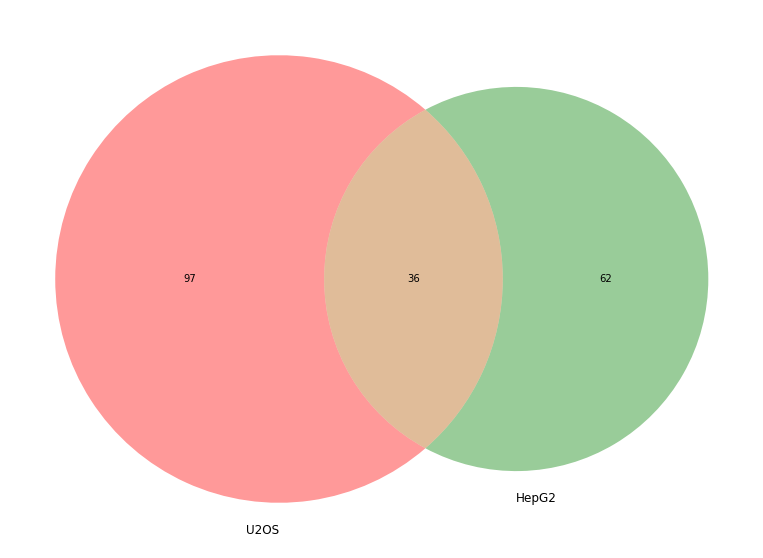

In [48]:
venn2(subsets = (toxic_U2OS_only, toxic_HepG2_only, toxic_U2OS_HepG2), set_labels = ('U2OS', 'HepG2'))

# Missing and toxic compounds

In [49]:
# TODO: add missing wells properly to toxic compounds dataset

In [50]:
U2OS_missing_compounds_clean = U2OS_missing_compounds.drop(["_merge"], axis=1)
U2OS_missing_compounds_clean = U2OS_missing_compounds_clean.rename(columns={"ID" : "Metadata_EOS"})

U2OS_Toxic_conditions_1_clean = U2OS_Toxic_conditions_1[["Metadata_EOS"]]

U2OS_toxic_all = pd.concat([U2OS_missing_compounds_clean, U2OS_Toxic_conditions_1_clean], ignore_index=True)

U2OS_toxic_all.shape

(177, 1)

In [51]:
len(U2OS_toxic_all["Metadata_EOS"].unique())

177

In [52]:
### 
filename = output_path + str(date.today()) + "_FMP_U2OS_toxic_all.csv"
U2OS_toxic_all.to_csv(filename, index = False)

In [53]:
HepG2_missing_compounds_clean = HepG2_missing_compounds.drop(["_merge"], axis=1)
HepG2_missing_compounds_clean = HepG2_missing_compounds_clean.rename(columns={"ID" : "Metadata_EOS"})

HepG2_Toxic_conditions_1_clean = HepG2_Toxic_conditions_1[["Metadata_EOS"]]

HepG2_toxic_all = pd.concat([HepG2_missing_compounds_clean, 
                            HepG2_Toxic_conditions_1_clean], ignore_index=True)

In [54]:
### 
filename = output_path + str(date.today()) + "_FMP_HepG2_toxic_all.csv"
HepG2_toxic_all.to_csv(filename, index = False)

In [55]:
len(HepG2_toxic_all["Metadata_EOS"].unique())

103

In [56]:
U2OS_HepG2_toxic_missing = pd.merge(U2OS_toxic_all,
                                  HepG2_toxic_all,
                                  on = ["Metadata_EOS"],
                                  how = "outer",
                                  indicator = True)
U2OS_HepG2_toxic_missing

,Metadata_EOS,_merge
0,EOS100060,both
1,EOS100077,both
2,EOS100113,both
3,EOS100293,both
4,EOS100341,both
...,...,...
195,EOS101400,right_only
196,EOS101413,right_only
197,EOS101448,right_only
198,EOS101466,right_only


In [57]:
toxic_missing_for_venn = U2OS_HepG2_toxic_missing['_merge'].value_counts()
toxic_missing_for_venn

left_only     97
both          80
right_only    23
Name: _merge, dtype: int64

In [58]:
toxic_missing_U2OS_only = toxic_missing_for_venn[0]
toxic_missing_HepG2_only = toxic_missing_for_venn[2]
toxic_missing_U2OS_HepG2 = toxic_missing_for_venn[1]

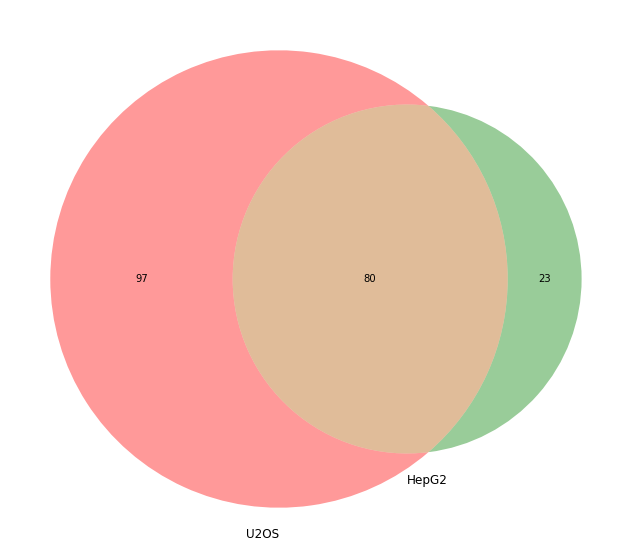

In [59]:
# visualization with missing wells
# PROBLEMATIC FIGURE: Missing Well Could be in toxic condition!!!
venn2(subsets = ( toxic_missing_U2OS_only, toxic_missing_HepG2_only, toxic_missing_U2OS_HepG2), set_labels = ('U2OS', 'HepG2'))
plt.savefig(figure_path + str(date.today()) + '_FMP_ToxicityOverlap.pdf',  dpi=300)
plt.show()